# 8. Data Visualization

#### Importing libraries and dataframe
#### Histogram of the "order_time_of_day"
#### Bar chart of "loyalty_flag"
#### Line chart of 'prices' by 'order_time_of_day'
#### Line chart of 'age' and 'n_dependants'
#### Scatterplot of 'age' and 'mean_price_of_product' 

Importing libraries and dataframe:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\01_2020_InstacartBasket'

In [3]:
ords_prods_customers = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'ords_prods_customers.pkl'))

In [5]:
ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Creating a histogram of the "order_time_of_day" column:

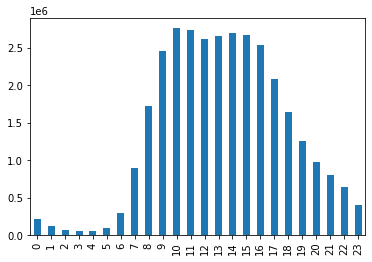

In [21]:
ords_hour_hist = ords_prods_customers['order_time_of_day'].value_counts().sort_index().plot.bar()

This histogram shows that orders are slow during the hours of 12am - 7am, the picks up around 8am, peaking between 9am-12pm, and finally starts to slow down after 5pm. 

Creating a bar chart from the "loyalty_flag" column to show the distribution of orders among customers in terms of loyalty:

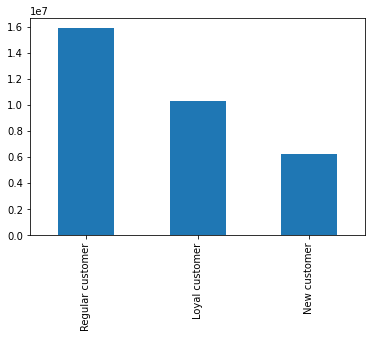

In [22]:
loyalty_hist = ords_prods_customers['loyalty_flag'].value_counts().plot.bar()

This simple histogram shows that most customers are 'Regular customers', and a good portion of the customer base are 'Loyal customers'. 

Finding if there is any difference in expenditure (the 'prices' column) depending on the hour of the day:

In [9]:
np.random.seed(4)

dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [10]:
big = ords_prods_customers[dev]

In [11]:
small = ords_prods_customers[~dev]

In [12]:
len(ords_prods_customers)

32404859

In [13]:
len(big) + len(small)

32404859

In [15]:
# Making a trimmed down dataframe from smaller-df, including just the 'prices' and 'order_time_of_day' columns.
prices_hours_df = small[['prices', 'order_time_of_day']]

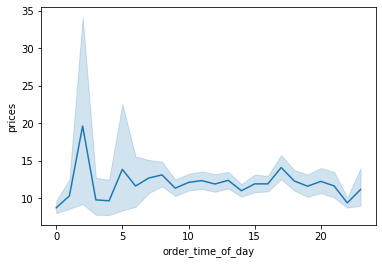

In [16]:
linechart = sns.lineplot(data = prices_hours_df, x = 'order_time_of_day', y = 'prices')

Interestingly, the prices of items bought between the hours of 12am to 6am have a tendency to be higher than the rest of the day, which for the most part stays even and consistent. 

Visualizing the connection, if any, between age and family status as a line chart: 

In [17]:
# Making a trimmed down dataframe from smaller-df, including just the 'age' and 'n_dependants' columns.
age_depen_df = small[['age', 'n_dependants']]

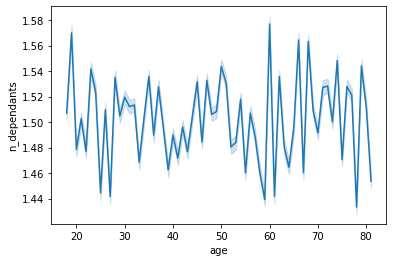

In [18]:
linechart_2 = sns.lineplot(data = age_depen_df, x = 'age', y = 'n_dependants')

This line chart shows that there isn't a clear pattern or relationship between age and number of dependants. There are some peaks to take notice: the number of dependants is highest aroudn age 19 and again at age 60.

Visualizing the connection, if any, between age and mean_price_of_product as a scatterplot: 

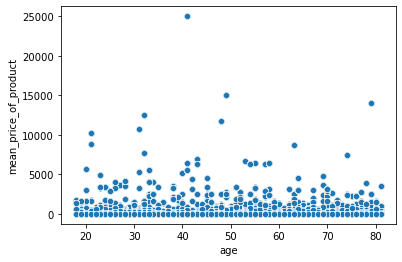

In [24]:
age_meanprice_plot = sns.scatterplot(x = 'age', y = 'mean_price_of_product', data = ords_prods_customers)

The scatterplot shows no clear indication that certain age range has stronger or weaker spending power. If anything, customers seem to purchase lower priced items from mid-40's on. If this is in fact true, perhaps people become more conservative spenders after their mid-40s. 

Exporting the visualizations:

In [25]:
ords_hour_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'ords_hour_hist.png'))

In [26]:
loyalty_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyalty_hist.png'))

In [27]:
linechart.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'time_price_line.png'))

In [28]:
age_price_plot.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_price_plot.png'))

In [29]:
age_meanprice_plot.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_meanprice_plot.png'))